In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

from scipy.stats import kurtosis
from scipy.stats import skew

plt.style.use('ggplot')


from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder


from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from scipy.stats import boxcox

from sklearn.decomposition import PCA

In [2]:
df_train = pd.read_csv("Dataset_spine.csv",encoding='latin')

In [46]:
list(df_train.columns)

['pelvic_incidence',
 'pelvic_tilt',
 'lumbar_lordosis_angle',
 'sacral_slope',
 'pelvic_radius',
 'degree_spondylolisthesis',
 'pelvic_slope',
 'Direct_tilt',
 'thoracic_slope',
 'cervical_tilt',
 'sacrum_angle',
 'scoliosis_slope',
 'Class_att']

In [3]:
df_train.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,Direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope,Class_att
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171,Abnormal


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 13 columns):
pelvic_incidence            310 non-null float64
pelvic_tilt                 310 non-null float64
lumbar_lordosis_angle       310 non-null float64
sacral_slope                310 non-null float64
pelvic_radius               310 non-null float64
degree_spondylolisthesis    310 non-null float64
pelvic_slope                310 non-null float64
Direct_tilt                 310 non-null float64
thoracic_slope              310 non-null float64
cervical_tilt               310 non-null float64
sacrum_angle                310 non-null float64
scoliosis_slope             310 non-null float64
Class_att                   310 non-null object
dtypes: float64(12), object(1)
memory usage: 31.6+ KB


In [5]:
df_train.describe()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,Direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694,0.472979,21.321526,13.064511,11.933317,-14.053139,25.645981
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027,0.285787,8.639423,3.399713,2.893265,12.225582,10.450558
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179,0.003220,7.027000,7.037800,7.030600,-35.287375,7.007900
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727,0.224367,13.054400,10.417800,9.541140,-24.289522,17.189075
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934,0.475989,21.907150,12.938450,11.953835,-14.622856,24.931950
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352,0.704846,28.954075,15.889525,14.371810,-3.497094,33.979600
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082,0.998827,36.743900,19.324000,16.821080,6.972071,44.341200


In [6]:
df_train.nunique()

pelvic_incidence            310
pelvic_tilt                 310
lumbar_lordosis_angle       280
sacral_slope                281
pelvic_radius               310
degree_spondylolisthesis    310
pelvic_slope                310
Direct_tilt                 310
thoracic_slope              310
cervical_tilt               310
sacrum_angle                310
scoliosis_slope             310
Class_att                     2
dtype: int64

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 13 columns):
pelvic_incidence            310 non-null float64
pelvic_tilt                 310 non-null float64
lumbar_lordosis_angle       310 non-null float64
sacral_slope                310 non-null float64
pelvic_radius               310 non-null float64
degree_spondylolisthesis    310 non-null float64
pelvic_slope                310 non-null float64
Direct_tilt                 310 non-null float64
thoracic_slope              310 non-null float64
cervical_tilt               310 non-null float64
sacrum_angle                310 non-null float64
scoliosis_slope             310 non-null float64
Class_att                   310 non-null object
dtypes: float64(12), object(1)
memory usage: 31.6+ KB


In [8]:
df_train.isnull().values.any()
# df_train.Col3 = df_train.Col3.fillna(df_train.mean())
# df_train.Col4 = df_train.Col4.fillna(df_train.mean())

False

In [9]:
le = LabelEncoder()

le.fit(df_train.Class_att.unique())

df_train.Class_att =le.fit_transform(df_train.Class_att)

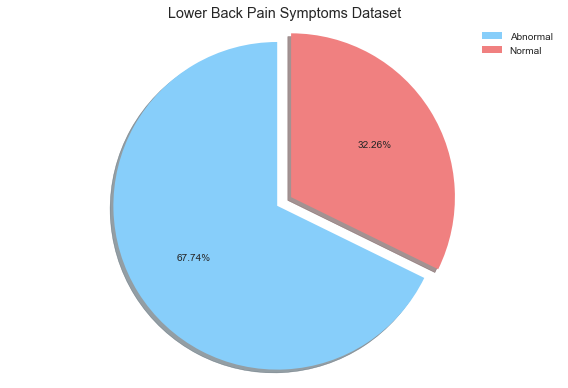

In [10]:
sizes = [  len(df_train.Class_att[df_train.Class_att == 0 ]), len(df_train.Class_att[df_train.Class_att == 1 ])]
colors = [ 'lightskyblue', 'lightcoral']
explode = (0.1,0)
patches, texts  , _ = plt.pie(sizes, explode=explode,colors=colors,autopct='%.2f%%',shadow=True, startangle=90)
plt.legend(patches, le.classes_, loc="best")
plt.axis('equal')
plt.title("Lower Back Pain Symptoms Dataset")
plt.tight_layout()
plt.show()

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  """Entry point for launching an IPython kernel.


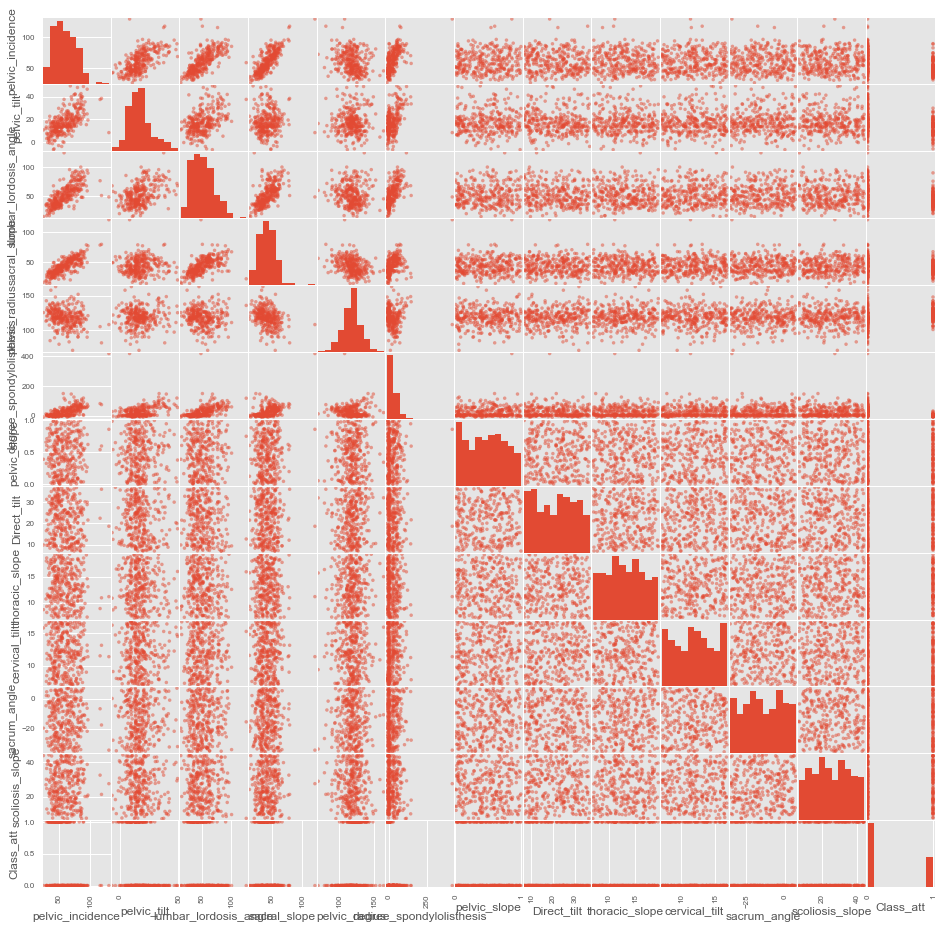

In [11]:
pd.scatter_matrix(df_train,figsize=(16, 16))
plt.show()

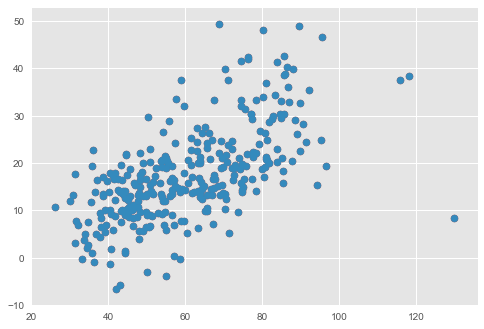

In [48]:
plt.scatter(df_train.pelvic_incidence,df_train.pelvic_tilt)
plt.show()

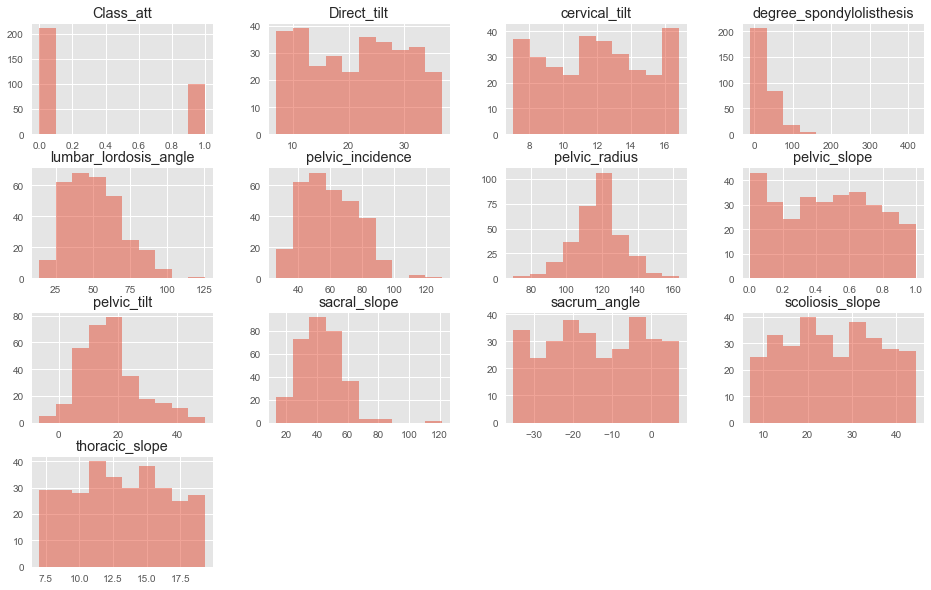

In [12]:
df_train.hist(alpha=0.5, figsize=(16, 10))
plt.show()

In [13]:
X = df_train.loc[:, df_train.columns != 'Class_att']
y = df_train.Class_att

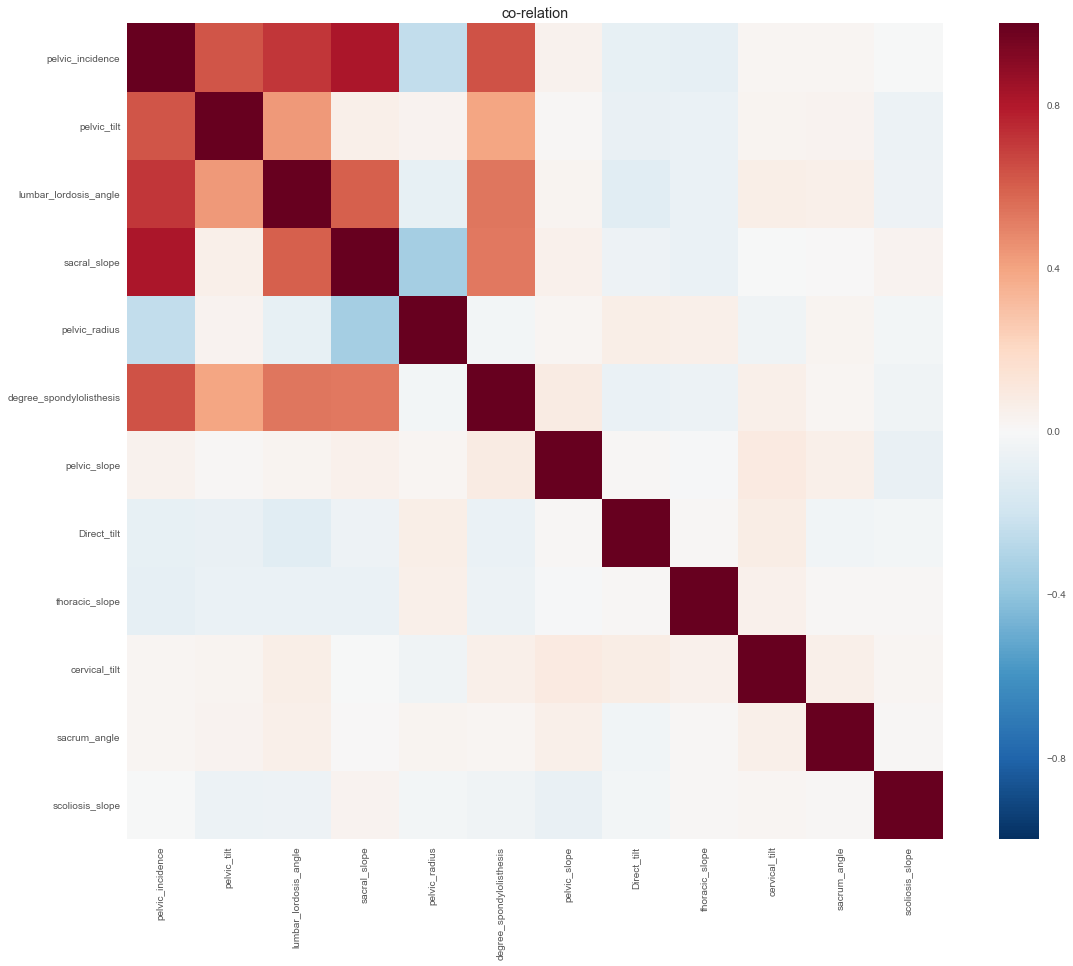

In [14]:
plt.subplots(figsize=(20,15))
sns.heatmap(X.corr(),square=True)
plt.title("co-relation")
plt.show()

In [15]:

rfc = RandomForestClassifier(n_jobs=-1)

lr = LinearRegression(n_jobs=-1)


def feature_importances_RFC(X,y):
    rfc.fit(X,y)
    plt.bar( range(len(rfc.feature_importances_)),rfc.feature_importances_)
    plt.title("feature_importances_RFC")
    plt.xticks(range(len(rfc.feature_importances_)), X.columns)
    plt.xticks(rotation=90)
    plt.show()

y_validation_pred = 0 

def lets_predict(X,y):
    X_train , X_test , y_train, y_test = train_test_split( X , y ,random_state=42)
   
    lr.fit(X_train , y_train)

    y_pred = lr.predict(X_test)
    
    global y_validation_pred 
    y_validation_pred = y_pred

    print(accuracy_score(y_test,y_pred.round()))

In [16]:
lets_predict(X,y)

0.807692307692


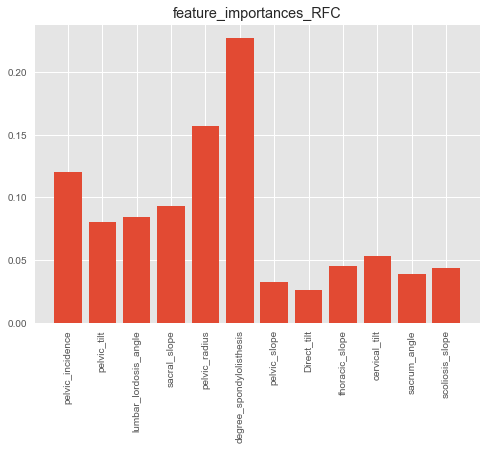

In [17]:
feature_importances_RFC(X,y)

In [18]:
X.skew()

pelvic_incidence            0.520440
pelvic_tilt                 0.676553
lumbar_lordosis_angle       0.599451
sacral_slope                0.792577
pelvic_radius              -0.176835
degree_spondylolisthesis    4.317954
pelvic_slope                0.016231
Direct_tilt                 0.010796
thoracic_slope              0.023046
cervical_tilt               0.015017
sacrum_angle               -0.015360
scoliosis_slope             0.064216
dtype: float64

In [19]:
dict_pos = {}
for col in X.columns:
    
    min_value_pos = np.abs(np.min(X[col])) + 1 
    a = []
    
    for i in X[col]:
        a.append( i + min_value_pos)
        
    dict_pos[col] = a   

In [20]:
X_positive_data  =  pd.DataFrame(data=dict_pos)

In [21]:
X_positive_data.skew()

Direct_tilt                 0.010796
cervical_tilt               0.015017
degree_spondylolisthesis    4.317954
lumbar_lordosis_angle       0.599451
pelvic_incidence            0.520440
pelvic_radius              -0.176835
pelvic_slope                0.016231
pelvic_tilt                 0.676553
sacral_slope                0.792577
sacrum_angle               -0.015360
scoliosis_slope             0.064216
thoracic_slope              0.023046
dtype: float64

In [22]:
for i in X_positive_data.columns:
    X_positive_data[i] = boxcox(X_positive_data[i])[0]

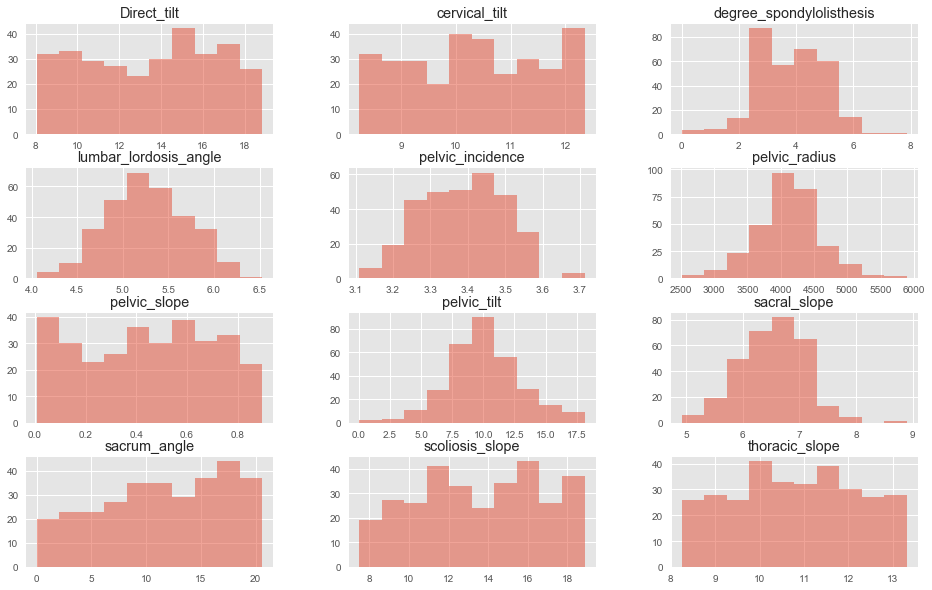

In [23]:
X_positive_data.hist(alpha=0.5, figsize=(16, 10))
plt.show()

In [24]:
ss = StandardScaler()
std_data  = ss.fit_transform(X_positive_data)

In [25]:
X_STD = pd.DataFrame(data=std_data ,columns=list(X.columns))

In [26]:
lets_predict(X_STD,y)

0.858974358974


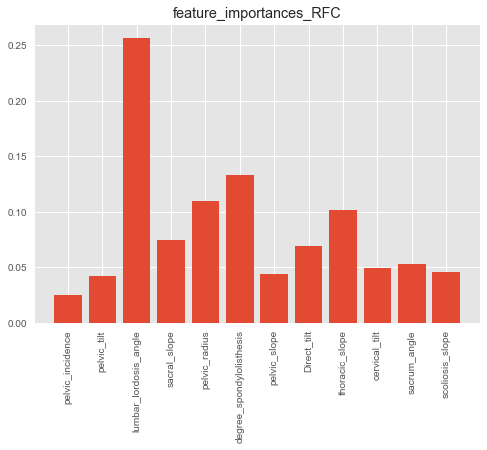

In [27]:
feature_importances_RFC(X_STD,y)

In [28]:
X_STD.skew()

pelvic_incidence           -0.093104
pelvic_tilt                -0.039920
lumbar_lordosis_angle      -0.001627
sacral_slope               -0.003476
pelvic_radius               0.004986
degree_spondylolisthesis    0.033547
pelvic_slope               -0.055644
Direct_tilt                 0.076950
thoracic_slope              0.006875
cervical_tilt              -0.247037
sacrum_angle               -0.082212
scoliosis_slope            -0.042274
dtype: float64

In [29]:
############ negative skew remove 

# a = []
# for i in X_STD.sacrum_angle:
#     a.append(i**2)

# X_STD.sacrum_angle = a 

# a = []
# for i in df_train.pelvic_radius:
#     a.append(i**2)

# X_STD.pelvic_radius = a 



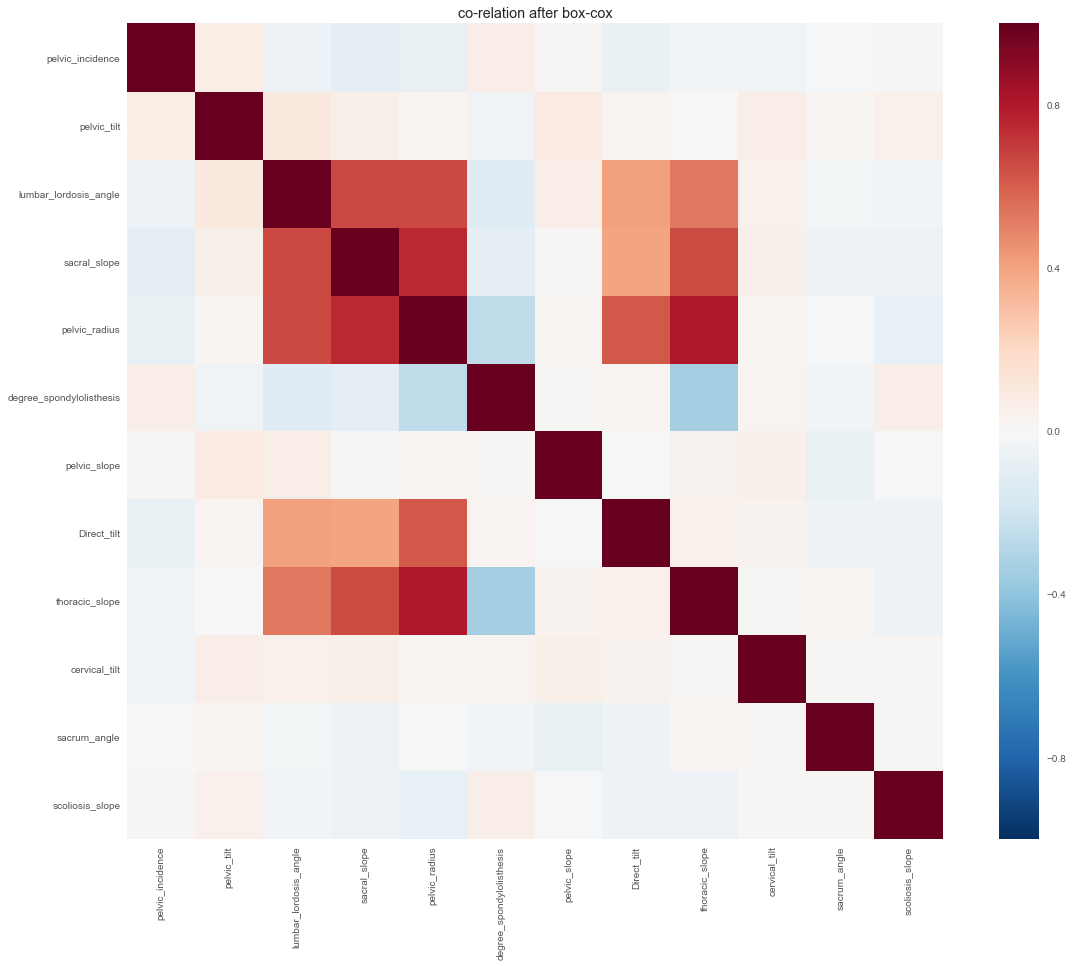

In [30]:
plt.subplots(figsize=(20,15))
sns.heatmap(X_STD.corr(),square=True)
plt.title("co-relation after box-cox")
plt.show()

In [31]:
pca = PCA(n_components=1)

In [32]:
X_STD.columns

Index(['pelvic_incidence', 'pelvic_tilt', 'lumbar_lordosis_angle',
       'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis',
       'pelvic_slope', 'Direct_tilt', 'thoracic_slope', 'cervical_tilt',
       'sacrum_angle', 'scoliosis_slope'],
      dtype='object')

In [33]:
pca_apply_list = ['pelvic_radius' ,'sacral_slope']

In [34]:
new_value = pca.fit_transform(X_STD[pca_apply_list])

In [35]:
new_value.shape

(310, 1)

In [36]:
list0fcol = list(X_STD.columns)

In [37]:
for i in pca_apply_list:
    list0fcol.remove(i)

In [38]:
len(list0fcol)

10

In [39]:
X_PCA_without =  X_STD[list0fcol]

In [40]:
X_pca_with = pd.DataFrame(data=new_value , columns=['pca1'])

In [41]:
new_pca_df = pd.concat([X_PCA_without,X_pca_with] ,axis=1)

In [42]:
new_pca_df.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,degree_spondylolisthesis,pelvic_slope,Direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope,pca1
0,-1.010885,1.158868,-0.926307,-1.426513,0.952489,0.558326,-0.099682,-1.201442,1.619424,0.452374,0.249178
1,-0.969949,1.642999,-0.557993,-0.288094,-0.174292,-0.714148,-1.077410,-0.893437,-0.898294,1.298956,2.156885
2,0.661405,1.602157,-1.266569,-0.906017,0.035232,0.527298,0.359003,-1.240224,-0.574884,1.286118,-0.420677
3,0.299742,-0.155210,-0.185800,-1.200902,-0.336916,0.750461,0.215916,-1.394845,-0.614607,-0.081566,-0.201119
4,1.571809,-1.061288,-0.355902,-0.747671,0.272505,-0.760821,-0.132066,-0.101727,-0.014233,0.856630,1.407375


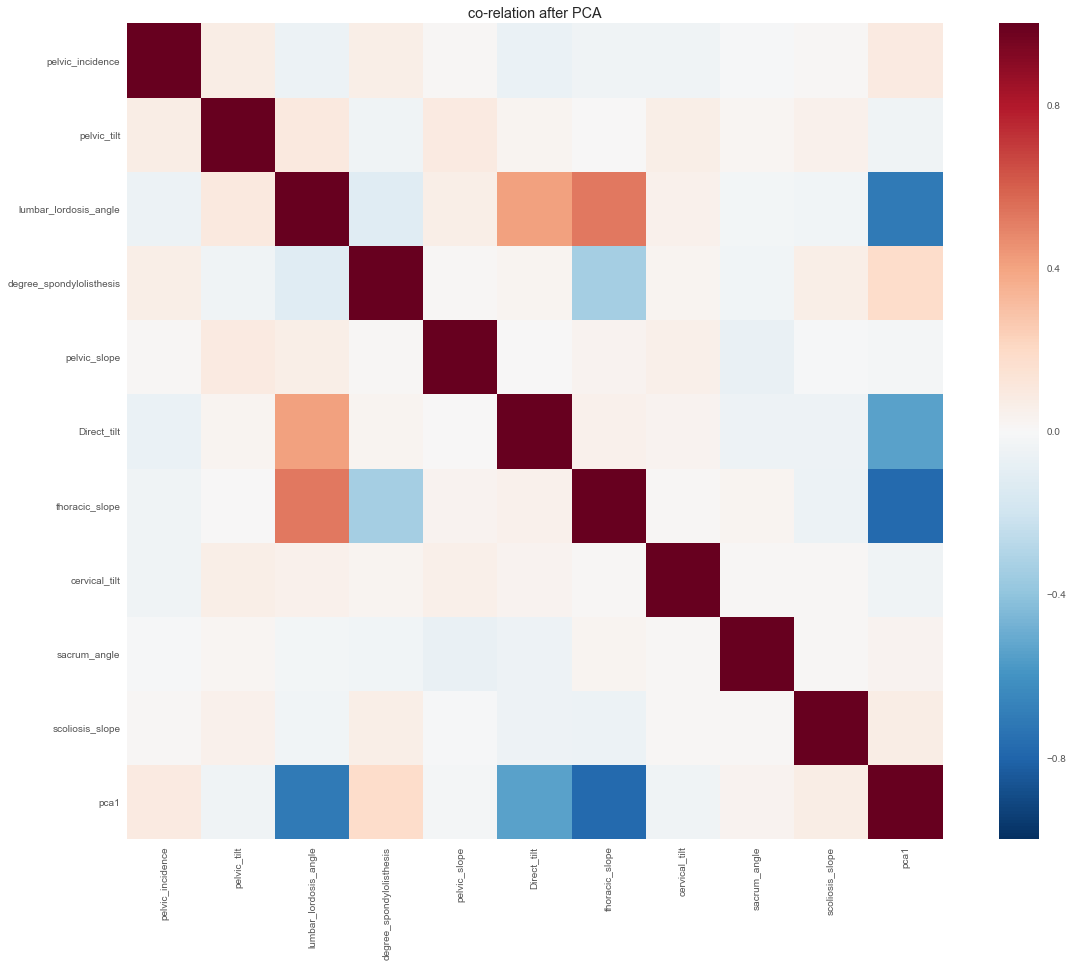

In [43]:
plt.subplots(figsize=(20,15))
sns.heatmap(new_pca_df.corr(),square=True)
plt.title("co-relation after PCA")
plt.show()

In [44]:
lets_predict(new_pca_df,df_train.Class_att)

0.871794871795


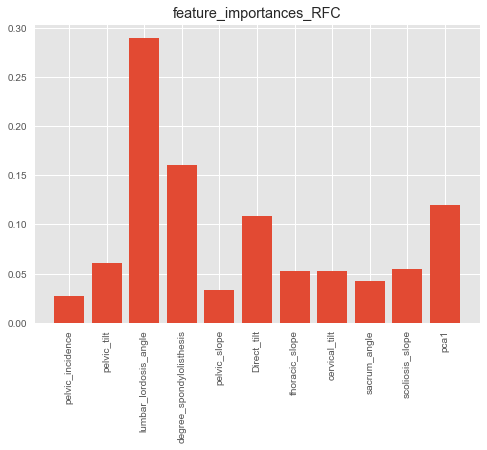

In [45]:
feature_importances_RFC(new_pca_df,df_train.Class_att)